In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/e14/pc5520/Plots/'


In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:38291' processes=6 threads=24, memory=128.00 GiB>

In [3]:
session_name = '/g/data/v45/wf4500/databases/gdata_01deg_jra55v13_ryf9091_DSW.db'
master_session = cc.database.create_session(session_name)
control = '01deg_jra55v13_ryf9091_DSW'

In [4]:
basal_gade_woa = 'accessom2-GPC023'

icb_gade_woa = 'accessom2-GPC026'

icb_gade_woa_p10 = 'accessom2-GPC027'

year = 1900
yearp1 = year+1

start_time=str(year)+'-01-01'
end_time=str(yearp1)+'-01-01'

lat_slice  = slice(-80,-59)

In [5]:
# build database for these experiments:
session_name = '/g/data/e14/pc5520/model_data/access-om2/basal_melt_MOM5/basal_melt_MOM5.db'
basal_melt_session = cc.database.create_session(session_name)

dir_list = ['/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC023/accessom2-GPC023/',
           '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC026/accessom2-GPC026/',
           '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC027/accessom2-GPC027/']

cc.database.build_index(dir_list,basal_melt_session)

Indexing experiment: accessom2-GPC023


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC026


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC027


0it [00:00, ?it/s]


0

In [6]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1).sel(yt_ocean=lat_slice)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = ht.yt_ocean.values
land_mask_lat[0] = -90

fontsize=15

In [7]:
#Plot ave basal temp

In [10]:
start_time='1907-01-01'
end_time='1908-01-01'
temp_basal = cc.querying.getvar(basal_gade_woa, 'temp_basal', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_basal_avet = temp_basal.sel(time=slice(start_time,end_time)).mean('time').load()

In [11]:
jpi,jpj = temp_basal_avet.shape[1],temp_basal_avet.shape[0]

temp_basal_min = np.zeros(jpi)

for ji in range(0,jpi):
    temp_basal_min[ji] = np.min(temp_basal_avet[:,ji])

(-90.0, -80.0)

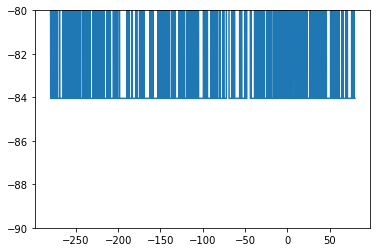

In [12]:
plt.plot(ht.xt_ocean,temp_basal_min)
plt.ylim(ymin=-90,ymax=-80)

In [13]:
start_time='1907-01-01'
end_time='1908-01-01'
temp_basalmix = cc.querying.getvar(basal_gade_woa,'temp_basalmix', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_basalmix = temp_basalmix.sel(time=slice(start_time,end_time)).mean('time').load()

In [14]:
jpi,jpj,jpk = temp_basalmix.shape[2],temp_basalmix.shape[1],temp_basalmix.shape[0]

temp_basalmix_min = np.zeros(jpi)

for ji in range(0,jpi):
    temp_basalmix_min[ji] = np.min(temp_basalmix[:,:,ji])

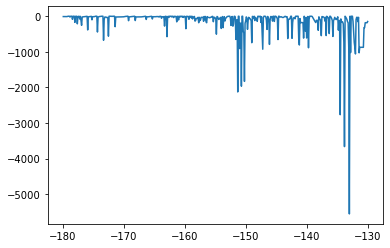

In [15]:
plt.plot(ht.xt_ocean[1000:1500],temp_basalmix_min[1000:1500])

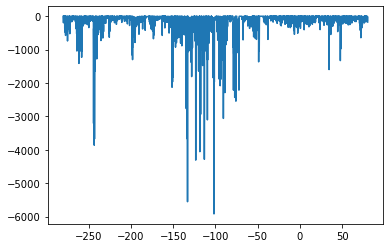

In [16]:
plt.plot(ht.xt_ocean,temp_basalmix_min)

In [17]:
#Plot ave icb temp

In [21]:
start_time='1902-01-01'
end_time='1903-01-01'
temp_icb = cc.querying.getvar(icb_gade_woa, 'temp_icb', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_icb_avet = temp_icb.sel(time=slice(start_time,end_time)).mean('time').load()

In [22]:
jpi,jpj = temp_icb_avet.shape[1],temp_icb_avet.shape[0]

temp_icb_min = np.zeros(jpi)

for ji in range(0,jpi):
    temp_icb_min[ji] = np.min(temp_icb_avet[:,ji])

(-90.0, -80.0)

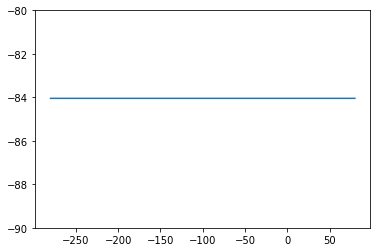

In [23]:
plt.plot(ht.xt_ocean,temp_icb_min)
plt.ylim(ymin=-90,ymax=-80)

In [30]:
start_time='1900-03-01'
end_time='1900-08-01'
basal = cc.querying.getvar(icb_gade_woa,'basal_fwflx2d', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
basal = basal.sel(time=slice(start_time,end_time)).sum('xt_ocean_sub01').sum('yt_ocean_sub01').load()

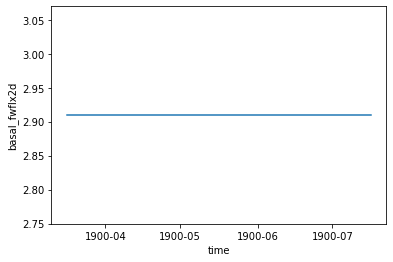

In [31]:
basal.plot()

In [11]:
start_time='1900-01-01'
end_time='1905-01-01'
icb_basal_hflux = cc.querying.getvar(icb_gade_woa,'temp_basalmix', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
icb_basal_hflux = icb_basal_hflux.sel(time=slice(start_time,end_time)).sel(yt_ocean=slice(-80,-39))
icb_basal_hflux = icb_basal_hflux.sum('xt_ocean').sum('yt_ocean').sum('st_ocean').load()

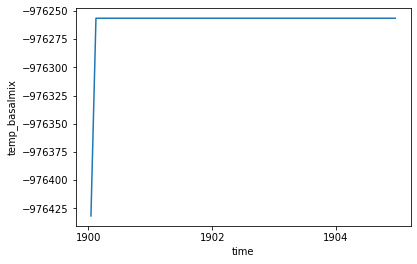

In [43]:
icb_basal.plot()

In [8]:
start_time='1900-01-01'
end_time='1905-01-01'
icb_hflux = cc.querying.getvar(icb_gade_woa,'temp_icbmix', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
icb_hflux = icb_hflux.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
icb_hflux = icb_hflux.sum('xt_ocean').sum('yt_ocean').sum('st_ocean').load()

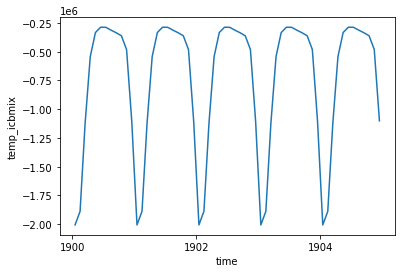

In [39]:
icb.plot()

In [12]:
icb_basal_hflux.sum()/icb_hflux.sum()

<xarray.DataArray ()>
array(1.2925222, dtype=float32)

In [40]:
start_time='1900-01-01'
end_time='1905-01-01'
icb = cc.querying.getvar(icb_gade_woa,'icb_fwflx2d', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
icb = icb.sel(time=slice(start_time,end_time)).sum('xt_ocean_sub01').sum('yt_ocean_sub01').load()

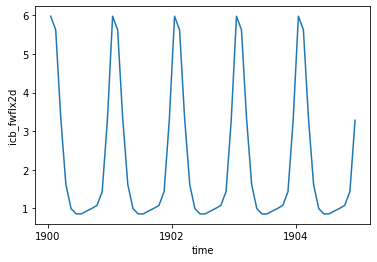

In [41]:
icb.plot()

In [7]:
start_time='1909-01-01'
end_time='1910-01-01'
icb = cc.querying.getvar(icb_gade_woa,'icb_fwflx2d', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
icb = icb.sel(time=slice(start_time,end_time)).mean('time').load()

In [ ]:
# Import salinity

In [ ]:
year = 1909
yearp1 = year+1

start_time=str(year)+'-01-01'
end_time=str(yearp1)+'-01-01'

In [33]:
#start_time='1909-01-01'
#end_time='1910-01-01'

salt_con = cc.querying.getvar(control, 'salt', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
salt_con = salt_con.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

salt_basal_gade = cc.querying.getvar(basal_gade_woa, 'salt', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
salt_basal_gade = salt_basal_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

salt_icb_gade = cc.querying.getvar(icb_gade_woa, 'salt', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
salt_icb_gade = salt_icb_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 558, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22416249521984 and this is thread id 22413336528640.
Exception closing connection <sqlite3.Connection object at 0x1462487f6c60>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/b

In [34]:
# select out bottom values:

depth_array = salt_con * 0 + salt_con.st_ocean
max_depth = depth_array.max(dim = 'st_ocean', skipna= True)

bottom_salt_con = salt_con.where(depth_array.st_ocean >= max_depth)
bottom_salt_con = bottom_salt_con.sum(dim = 'st_ocean')
bottom_salt_con = bottom_salt_con.load()

bottom_salt_basal_gade = salt_basal_gade.where(depth_array.st_ocean >= max_depth)
bottom_salt_basal_gade = bottom_salt_basal_gade.sum(dim = 'st_ocean')
bottom_salt_basal_gade = bottom_salt_basal_gade.load()

bottom_salt_icb_gade = salt_icb_gade.where(depth_array.st_ocean >= max_depth)
bottom_salt_icb_gade = bottom_salt_icb_gade.sum(dim = 'st_ocean')
bottom_salt_icb_gade = bottom_salt_icb_gade.load()

In [35]:
k1,k2 = 34,43

salt_con_lev = salt_con[k1:k2,:,:]
salt_basal_gade_lev = salt_basal_gade[k1:k2,:,:]
salt_icb_gade_lev = salt_icb_gade[k1:k2,:,:]

diff_salt_basal_gade_con = salt_basal_gade_lev - salt_con_lev
diff_salt_icb_gade_con = salt_icb_gade_lev - salt_con_lev

In [36]:
avek_diff_salt_basal_gade_con = diff_salt_basal_gade_con.mean('st_ocean')
avek_diff_salt_icb_gade_con = diff_salt_icb_gade_con.mean('st_ocean')

#avek_diff_salt_basal_gade_con = (diff_salt_basal_gade_con*diff_salt_basal_gade_con.st_ocean).sum('st_ocean')/diff_salt_basal_gade_con.st_ocean.sum()
#avek_diff_salt_icb_gade_con = (diff_salt_icb_gade_con*diff_salt_basal_gade_con.st_ocean).sum('st_ocean')/diff_salt_basal_gade_con.st_ocean.sum()

salt_con_lev_pl = (salt_con_lev*salt_con_lev.st_ocean).sum('st_ocean')/salt_con_lev.st_ocean.sum()
salt_basal_gade_lev_pl = (salt_basal_gade_lev*salt_con_lev.st_ocean).sum('st_ocean')/salt_con_lev.st_ocean.sum()
salt_icb_gade_lev_pl = (salt_icb_gade_lev*salt_con_lev.st_ocean).sum('st_ocean')/salt_con_lev.st_ocean.sum()

In [37]:
avet_avek_diff_salt_basal_gade_con = avek_diff_salt_basal_gade_con#.mean('time')
avet_avek_diff_salt_icb_gade_con = avek_diff_salt_icb_gade_con

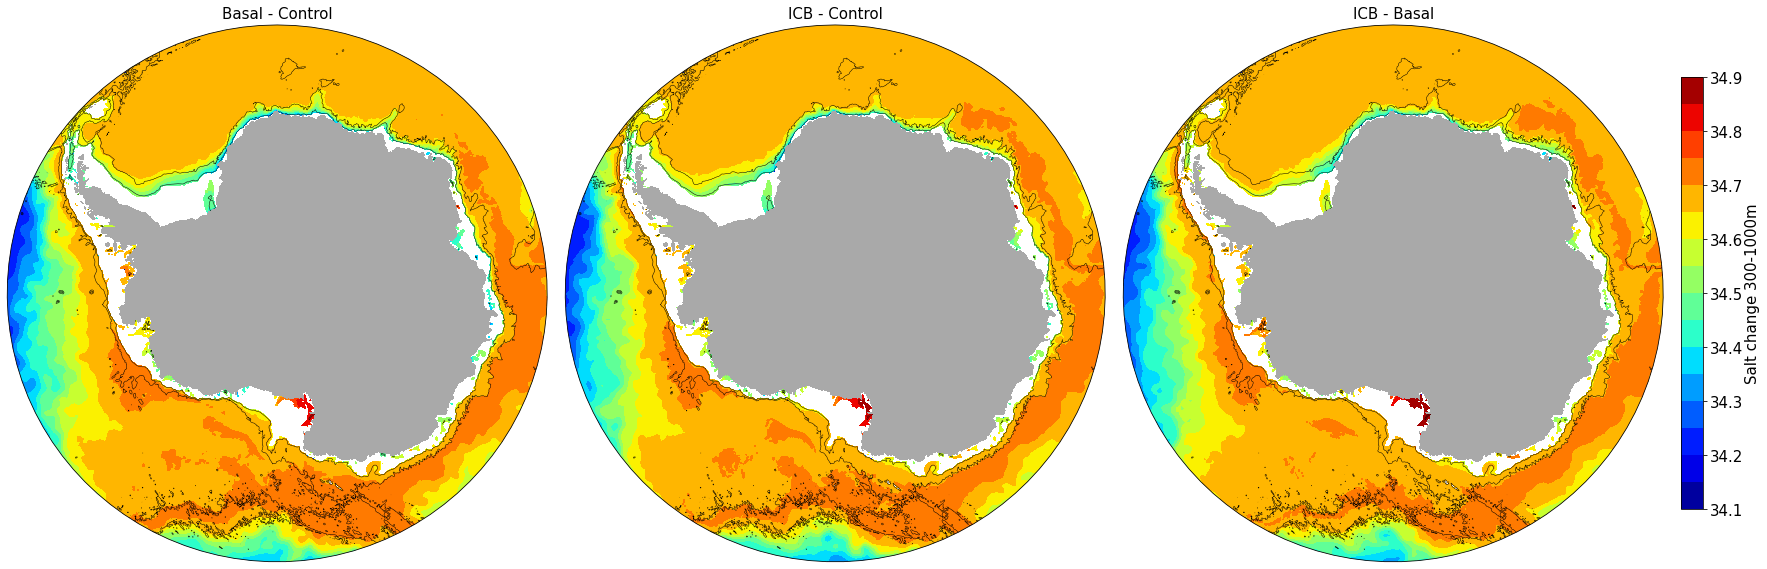

In [38]:
scale_max = .3

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

norm = col.Normalize(vmin=34.1,vmax=34.9)
levels=np.arange(34.1,34.905,.05)
ticks = [34.3,34.4,34.5,34.6,34.7,34.8]

## plot:
cf = ax.contourf(salt_con.xt_ocean, salt_con.yt_ocean, salt_con_lev_pl, norm = norm,  
                   levels = levels,cmap = cmocean.cm.jet, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Tfreezing_min
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.contourf(salt_con.xt_ocean, salt_con.yt_ocean, salt_basal_gade_lev_pl, norm = norm,  
                   levels = levels,cmap = cmocean.cm.jet, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
#cbaxes = fig.add_axes([0.61, 0.25, 0.012, 0.5])
#cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
#cbar.set_label(r'Tfreezing_min',fontsize=fontsize,labelpad=2)
#cbar.ax.tick_params(labelsize=fontsize)

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.contourf(salt_con.xt_ocean, salt_con.yt_ocean, salt_icb_gade_lev_pl, norm = norm, 
                   levels = levels,cmap = cmocean.cm.jet, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Salt change 300-1000m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
#plt.savefig(figdir+'salt_middepth_y'+str(year)+'.png')

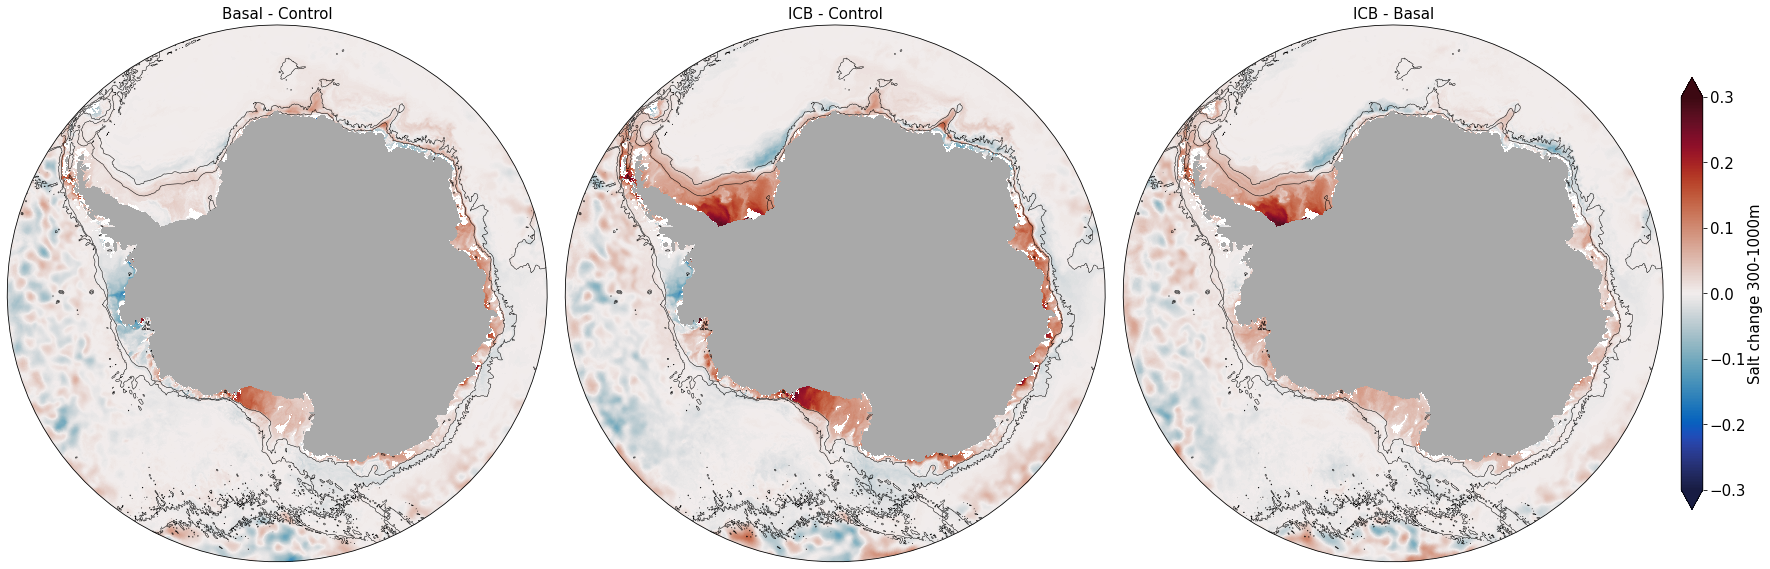

In [39]:
scale_max = .3

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Tfreezing_min
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_icb_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
#cbaxes = fig.add_axes([0.61, 0.25, 0.012, 0.5])
#cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
#cbar.set_label(r'Tfreezing_min',fontsize=fontsize,labelpad=2)
#cbar.ax.tick_params(labelsize=fontsize)

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_icb_gade_con-avet_avek_diff_salt_basal_gade_con, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Salt change 300-1000m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'salt_middepth_y'+str(year)+'.png')

In [40]:
#Temp

In [8]:
#start_time='1909-01-01'
#end_time='1910-01-01'

temp_con = cc.querying.getvar(control, 'temp', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_con = temp_con.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

temp_basal_gade = cc.querying.getvar(basal_gade_woa, 'temp', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_basal_gade = temp_basal_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

temp_icb_gade = cc.querying.getvar(icb_gade_woa, 'temp', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_icb_gade = temp_icb_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

In [9]:
# select out bottom values:

depth_array = temp_con * 0 + temp_con.st_ocean
max_depth = depth_array.max(dim = 'st_ocean', skipna= True)

bottom_temp_con = temp_con.where(depth_array.st_ocean >= max_depth)
bottom_temp_con = bottom_temp_con.sum(dim = 'st_ocean')
bottom_temp_con = bottom_temp_con.load()

bottom_temp_basal_gade = temp_basal_gade.where(depth_array.st_ocean >= max_depth)
bottom_temp_basal_gade = bottom_temp_basal_gade.sum(dim = 'st_ocean')
bottom_temp_basal_gade = bottom_temp_basal_gade.load()

bottom_temp_icb_gade = temp_icb_gade.where(depth_array.st_ocean >= max_depth)
bottom_temp_icb_gade = bottom_temp_icb_gade.sum(dim = 'st_ocean')
bottom_temp_icb_gade = bottom_temp_icb_gade.load()

In [43]:
k1,k2 = 34,43

temp_con_k = temp_con[k1:k2,:,:]
temp_basal_gade_k = temp_basal_gade[k1:k2,:,:]
temp_icb_gade_k = temp_icb_gade[k1:k2,:,:]

diff_temp_basal_gade_con = temp_basal_gade_k - temp_con_k
diff_temp_icb_gade_con = temp_icb_gade_k - temp_con_k

In [44]:
#Simple average
avek_diff_temp_basal_gade_con = diff_temp_basal_gade_con.mean('st_ocean')
avek_diff_temp_icb_gade_con = diff_temp_icb_gade_con.mean('st_ocean')

#Weigthed average
#avek_diff_temp_basal_gade_con = (diff_temp_basal_gade_con*diff_temp_basal_gade_con.st_ocean).sum('st_ocean')/diff_temp_basal_gade_con.st_ocean.sum()
#avek_diff_temp_icb_gade_con = (diff_temp_icb_gade_con*diff_temp_basal_gade_con.st_ocean).sum('st_ocean')/diff_temp_basal_gade_con.st_ocean.sum()

In [45]:
avet_avek_diff_temp_basal_gade_con = avek_diff_temp_basal_gade_con
avet_avek_diff_temp_icb_gade_con = avek_diff_temp_icb_gade_con

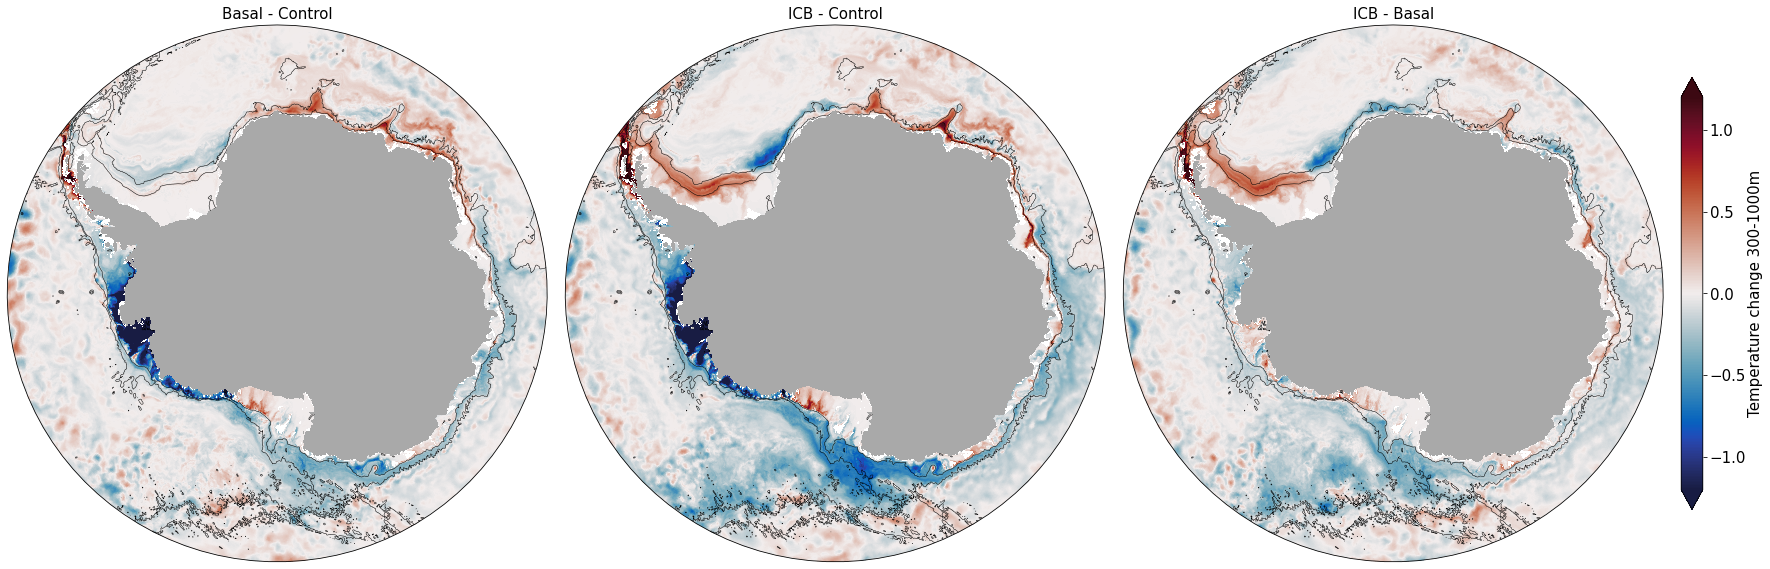

In [46]:
scale_max = 1.2

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# basal
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# icb
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_icb_gade_con, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_icb_gade_con-avet_avek_diff_temp_basal_gade_con, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Temperature change 300-1000m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'temp_middepth_y'+str(year)+'.png')

In [47]:
#Age

In [48]:
#start_time='1909-01-01'
#end_time='1910-01-01'
age_con = cc.querying.getvar(control, 'age_global', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
age_con = age_con.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

age_basal_gade = cc.querying.getvar(basal_gade_woa, 'age_global', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
age_basal_gade = age_basal_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

age_icb_gade = cc.querying.getvar(icb_gade_woa, 'age_global', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
age_icb_gade = age_icb_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice).mean('time').load()

In [49]:
# select out bottom values:

depth_array = age_con * 0 + age_con.st_ocean
max_depth = depth_array.max(dim = 'st_ocean', skipna= True)

bottom_age_con = age_con.where(depth_array.st_ocean >= max_depth)
bottom_age_con = bottom_age_con.sum(dim = 'st_ocean')
bottom_age_con = bottom_age_con.load()

bottom_age_basal_gade = age_basal_gade.where(depth_array.st_ocean >= max_depth)
bottom_age_basal_gade = bottom_age_basal_gade.sum(dim = 'st_ocean')
bottom_age_basal_gade = bottom_age_basal_gade.load()

bottom_age_icb_gade = age_icb_gade.where(depth_array.st_ocean >= max_depth)
bottom_age_icb_gade = bottom_age_icb_gade.sum(dim = 'st_ocean')
bottom_age_icb_gade = bottom_age_icb_gade.load()

In [50]:
k1,k2 = 34,43

age_con_k = age_con[k1:k2,:,:]
age_basal_gade_k = age_basal_gade[k1:k2,:,:]
age_icb_gade_k = age_icb_gade[k1:k2,:,:]

diff_age_basal_gade_con = age_basal_gade_k - age_con_k
diff_age_icb_gade_con = age_icb_gade_k - age_con_k

In [51]:
#Simple Average
avek_diff_age_basal_gade_con = diff_age_basal_gade_con.mean('st_ocean')
avek_diff_age_icb_gade_con = diff_age_icb_gade_con.mean('st_ocean')

In [52]:
avet_avek_diff_age_basal_gade_con = avek_diff_age_basal_gade_con#.mean('time')
avet_avek_diff_age_icb_gade_con = avek_diff_age_icb_gade_con#.mean('time')

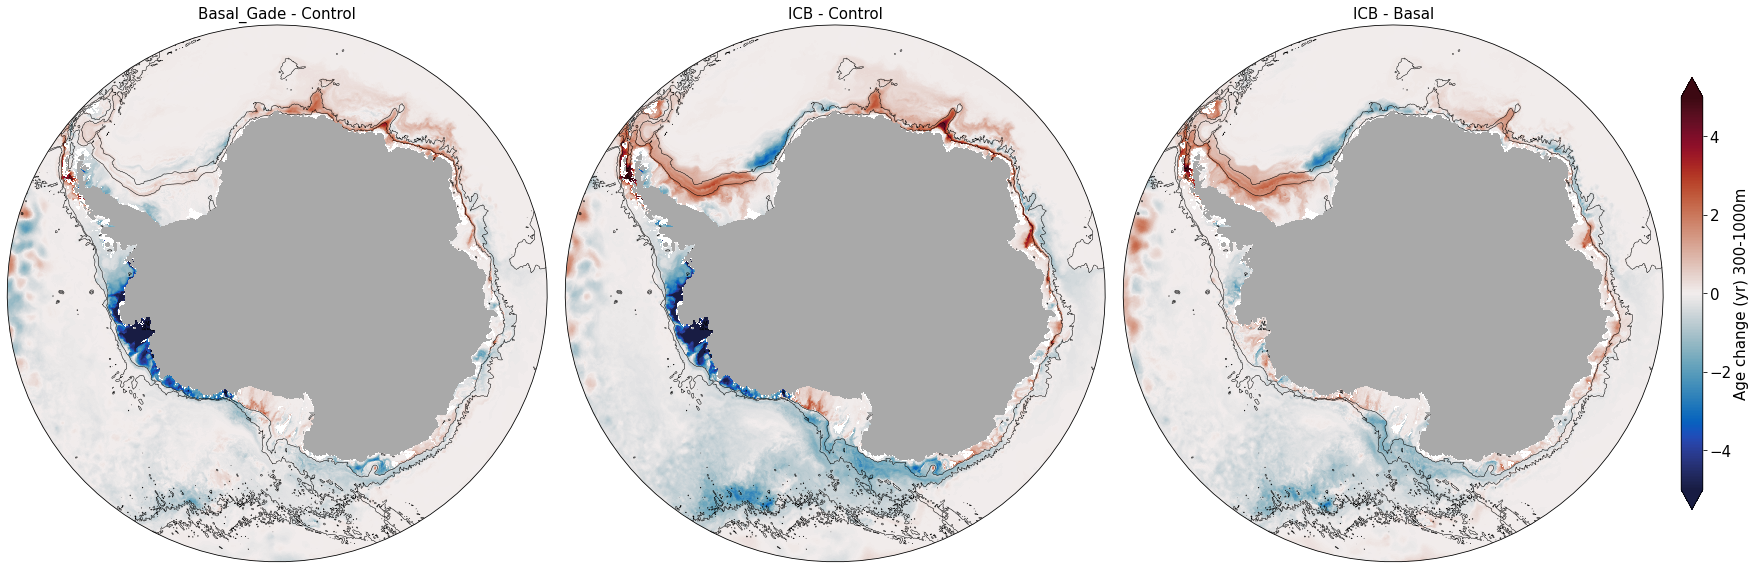

In [53]:
scale_max = 5

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Basal
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# icb
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_icb_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# icb - basal
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_icb_gade_con - avet_avek_diff_age_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Age change (yr) 300-1000m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'age_middepth_y'+str(year)+'.png')

# BOTTOM plots

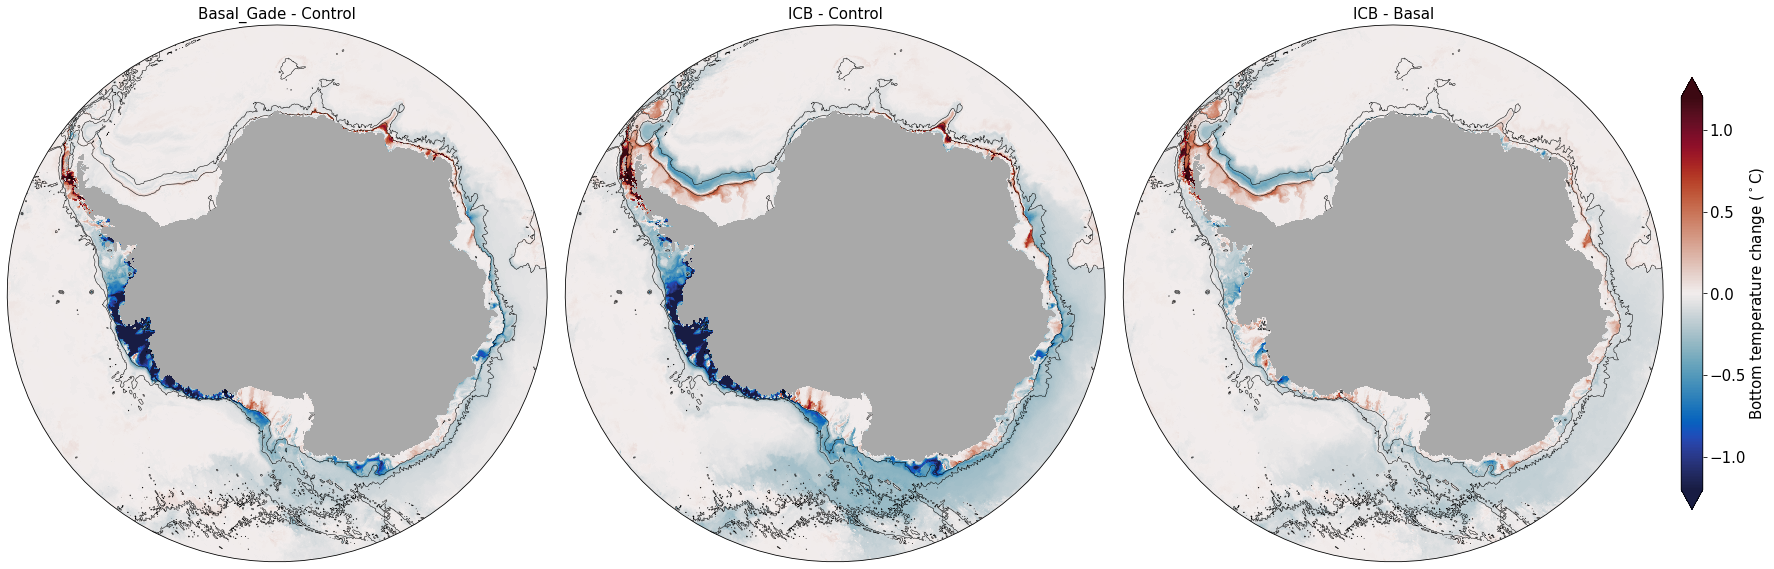

In [10]:
scale_max = 1.2

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)
norm2 = col.Normalize(vmin=-2.4,vmax=1.5)

# Basal
# setup stereo projection:
ax = fig.add_axes([0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, bottom_temp_basal_gade - bottom_temp_con,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
# setup stereo projection:
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, bottom_temp_icb_gade - bottom_temp_con,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Basal
# setup stereo projection:
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, bottom_temp_icb_gade - bottom_temp_basal_gade,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom temperature change ($^\circ$C)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'temp_bottom_y'+str(year)+'.png')

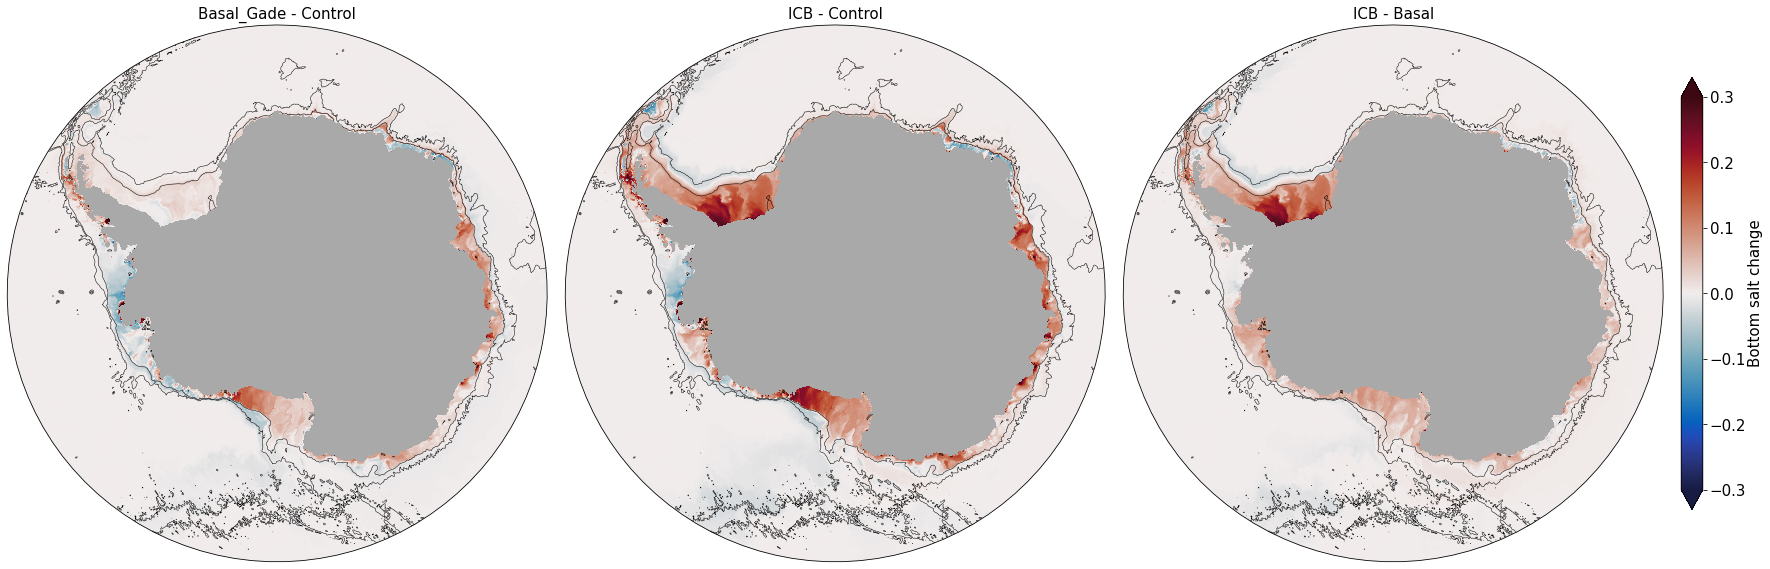

In [55]:
scale_max = .3

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Basal
# setup stereo projection:
ax = fig.add_axes([0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=34.2,35.2,0.05
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_salt_con.xt_ocean, bottom_salt_con.yt_ocean, bottom_salt_basal_gade-bottom_salt_con, 
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
# setup stereo projection:
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=34.2,35.2,0.05
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_salt_con.xt_ocean, bottom_salt_con.yt_ocean, bottom_salt_icb_gade-bottom_salt_con, 
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB - Basal
# setup stereo projection:
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=34.2,35.2,0.05
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf = ax.pcolormesh(bottom_salt_con.xt_ocean, bottom_salt_con.yt_ocean, bottom_salt_icb_gade-bottom_salt_basal_gade, 
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom salt change',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'salt_bottom_y'+str(year)+'.png')

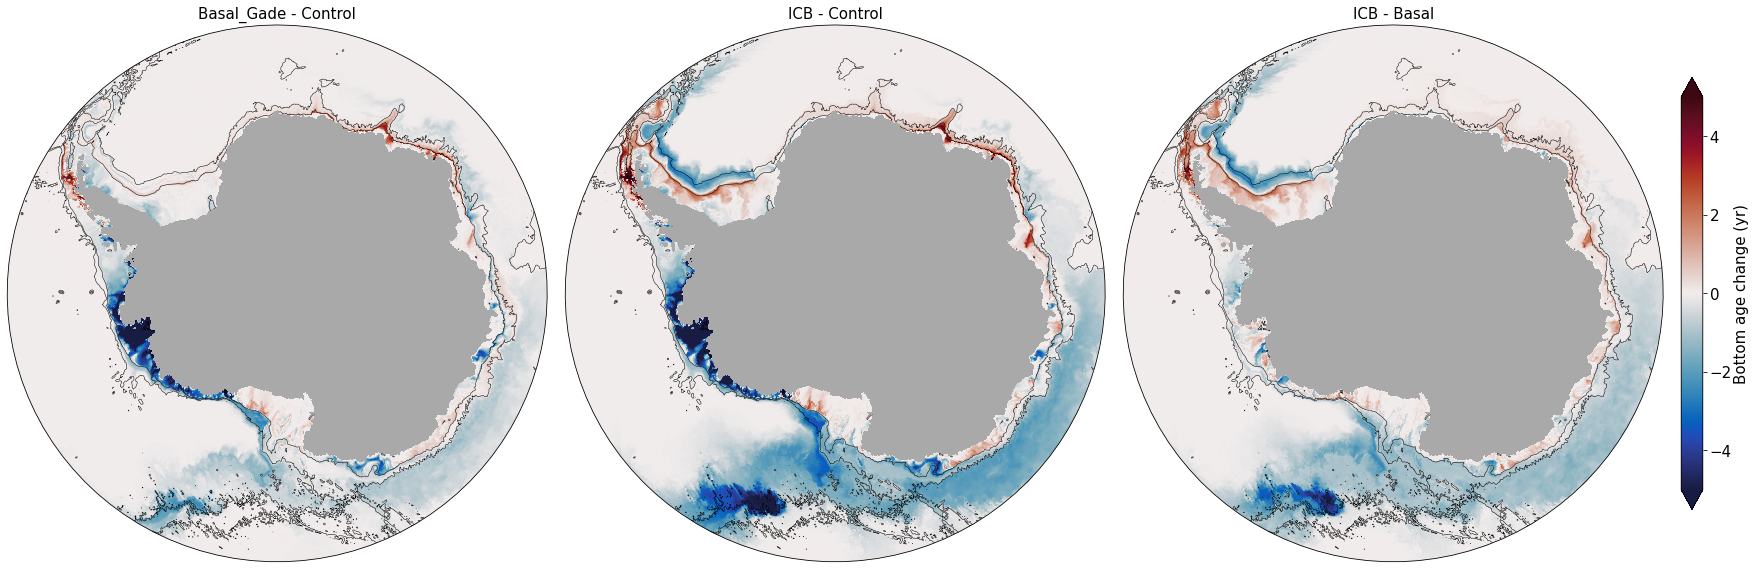

In [56]:
scale_max = 5

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)
norm2 = col.Normalize(vmin=-2.4,vmax=1.5)

# Basal
# setup stereo projection:
ax = fig.add_axes([0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf1 = ax.pcolormesh(bottom_age_con.xt_ocean, bottom_age_con.yt_ocean, bottom_age_basal_gade - bottom_age_con,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
# setup stereo projection:
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf1 = ax.pcolormesh(bottom_age_con.xt_ocean, bottom_age_con.yt_ocean, bottom_age_icb_gade - bottom_age_con,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB - Basal
# setup stereo projection:
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
vmin,vmax,contourstep=-2.4,1.7,0.2
#nb_contours = np.ceil((vmax-vmin)/contourstep)
nb_contours = 20
#contours = np.arange(vmin,vmax+contourstep,contourstep)
contours = [round(x , 4) for x in np.linspace(vmin,vmax,int(nb_contours+1))]
cf1 = ax.pcolormesh(bottom_age_con.xt_ocean, bottom_age_con.yt_ocean, bottom_age_icb_gade - bottom_age_basal_gade,
                   norm=norm,cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf1, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom age change (yr)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'age_bottom_y'+str(year)+'.png')

# Diff at the first 300m

In [57]:
temp_con_k = temp_con[1:34,:,:]
temp_basal_gade_k = temp_basal_gade[1:34,:,:]
temp_icb_gade_k = temp_icb_gade[1:34,:,:]

diff_temp_basal_gade_con = temp_basal_gade_k - temp_con_k
diff_temp_icb_gade_con = temp_icb_gade_k - temp_con_k

avek_temp_con = temp_con.mean('st_ocean')
avek_diff_temp_basal_gade_con = diff_temp_basal_gade_con.mean('st_ocean')
avek_diff_temp_icb_gade_con = diff_temp_icb_gade_con.mean('st_ocean')

avet_avek_diff_temp_basal_gade_con = avek_diff_temp_basal_gade_con#.mean('time')
avet_avek_diff_temp_icb_gade_con = avek_diff_temp_icb_gade_con#.mean('time')

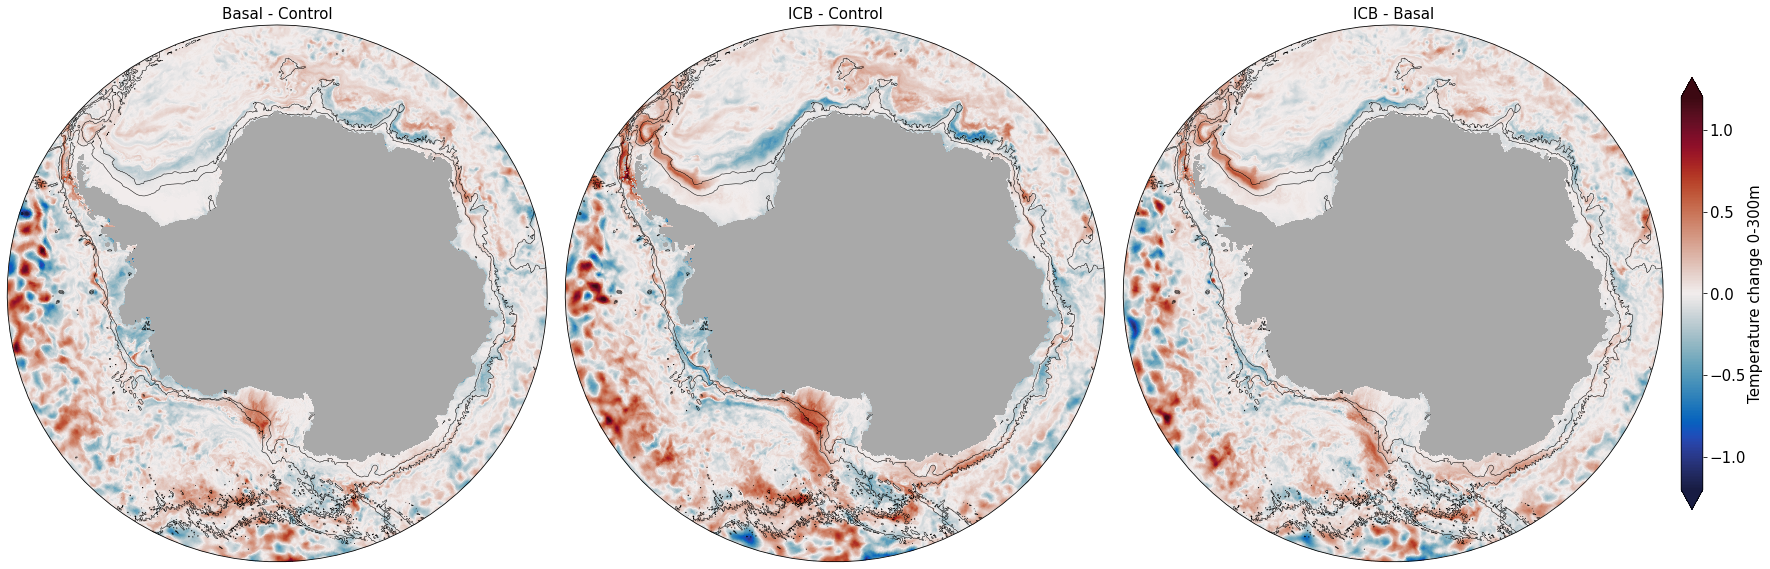

In [58]:
scale_max = 1.2

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Basal
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_icb_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

#ax.contour(icb.xt_ocean_sub01,icb.yt_ocean_sub01,icb,levels=[0.000001,0.000002],colors='k',linewidths=2,transform = ccrs.PlateCarree())

# ICB - Basal
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(temp_con.xt_ocean, temp_con.yt_ocean, avet_avek_diff_temp_icb_gade_con - avet_avek_diff_temp_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Temperature change 0-300m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'temp_surf_y'+str(year)+'.png')

In [59]:
k1,k2=0,34

salt_con_k = salt_con[k1:k2,:,:]
salt_basal_gade_k = salt_basal_gade[k1:k2,:,:]
salt_icb_gade_k = salt_icb_gade[k1:k2,:,:]

diff_salt_basal_gade_con = salt_basal_gade_k - salt_con_k
diff_salt_icb_gade_con = salt_icb_gade_k - salt_con_k

#avek_diff_salt_basal_gade_con = diff_salt_basal_gade_con.mean('st_ocean')
#avek_diff_salt_icb_gade_con = diff_salt_icb_gade_con.mean('st_ocean')
avek_diff_salt_basal_gade_con = (diff_salt_basal_gade_con*diff_salt_basal_gade_con.st_ocean).sum('st_ocean')/diff_salt_basal_gade_con.st_ocean.sum()
avek_diff_salt_icb_gade_con = (diff_salt_icb_gade_con*diff_salt_basal_gade_con.st_ocean).sum('st_ocean')/diff_salt_basal_gade_con.st_ocean.sum()

avet_avek_diff_salt_basal_gade_con = avek_diff_salt_basal_gade_con#.mean('time')
avet_avek_diff_salt_icb_gade_con = avek_diff_salt_icb_gade_con#.mean('time')

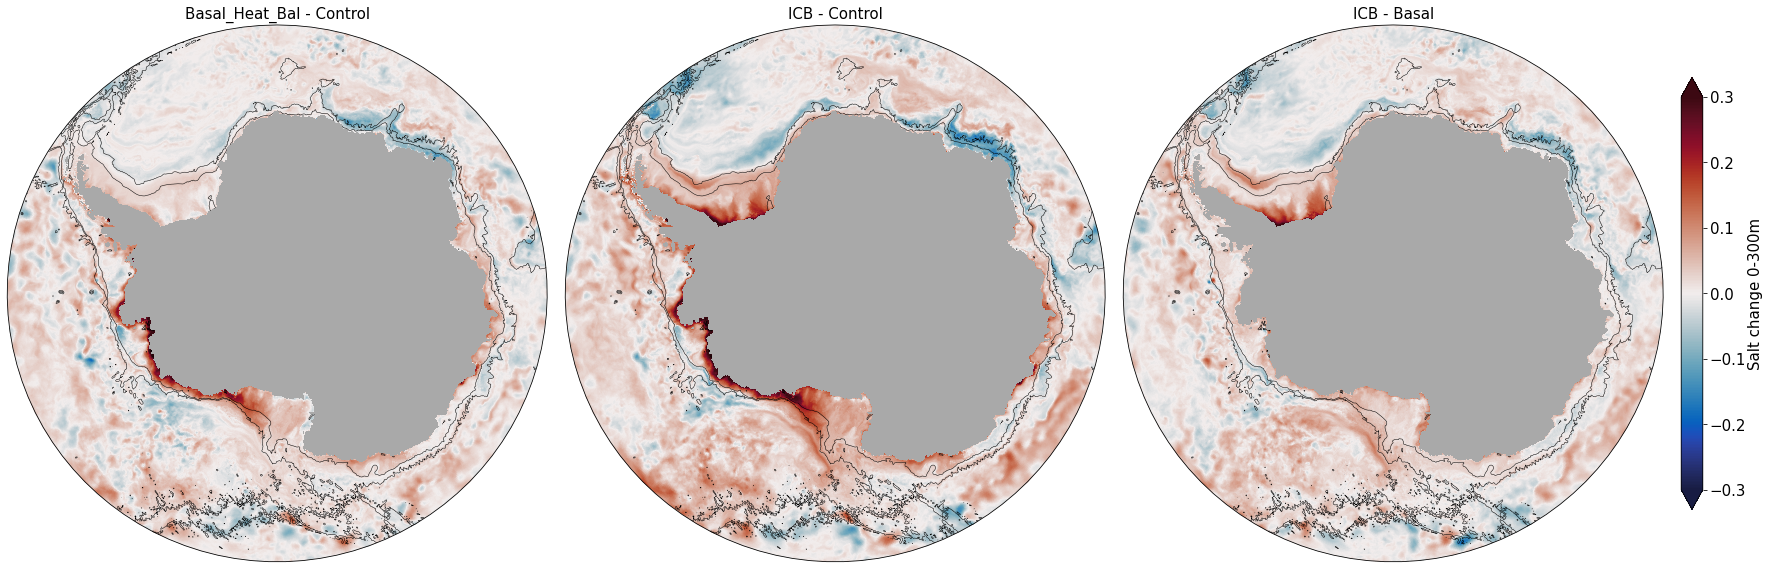

In [60]:
scale_max = .3

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Basal
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Heat_Bal - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_icb_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB - Basal
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(salt_con.xt_ocean, salt_con.yt_ocean, avet_avek_diff_salt_icb_gade_con - avet_avek_diff_salt_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Salt change 0-300m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'salt_surf_y'+str(year)+'.png')

In [61]:
k1,k2=0,34

age_con_k = age_con[k1:k2,:,:]
age_basal_gade_k = age_basal_gade[k1:k2,:,:]
age_icb_gade_k = age_icb_gade[k1:k2,:,:]


diff_age_basal_gade_con = age_basal_gade_k - age_con_k
diff_age_icb_gade_con = age_icb_gade_k - age_con_k

In [62]:
avek_diff_age_basal_gade_con = diff_age_basal_gade_con.mean('st_ocean')
avek_diff_age_icb_gade_con = diff_age_icb_gade_con.mean('st_ocean')

#avek_diff_age_basal_gade_con = (diff_age_basal_gade_con*diff_age_basal_gade_con.st_ocean).sum('st_ocean')/diff_age_basal_gade_con.st_ocean.sum()
#avek_diff_age_icb_gade_con = (diff_age_icb_gade_con*diff_age_basal_gade_con.st_ocean).sum('st_ocean')/diff_age_basal_gade_con.st_ocean.sum()

avet_avek_diff_age_basal_gade_con = avek_diff_age_basal_gade_con#.mean('time')
avet_avek_diff_age_icb_gade_con = avek_diff_age_icb_gade_con#.mean('time')

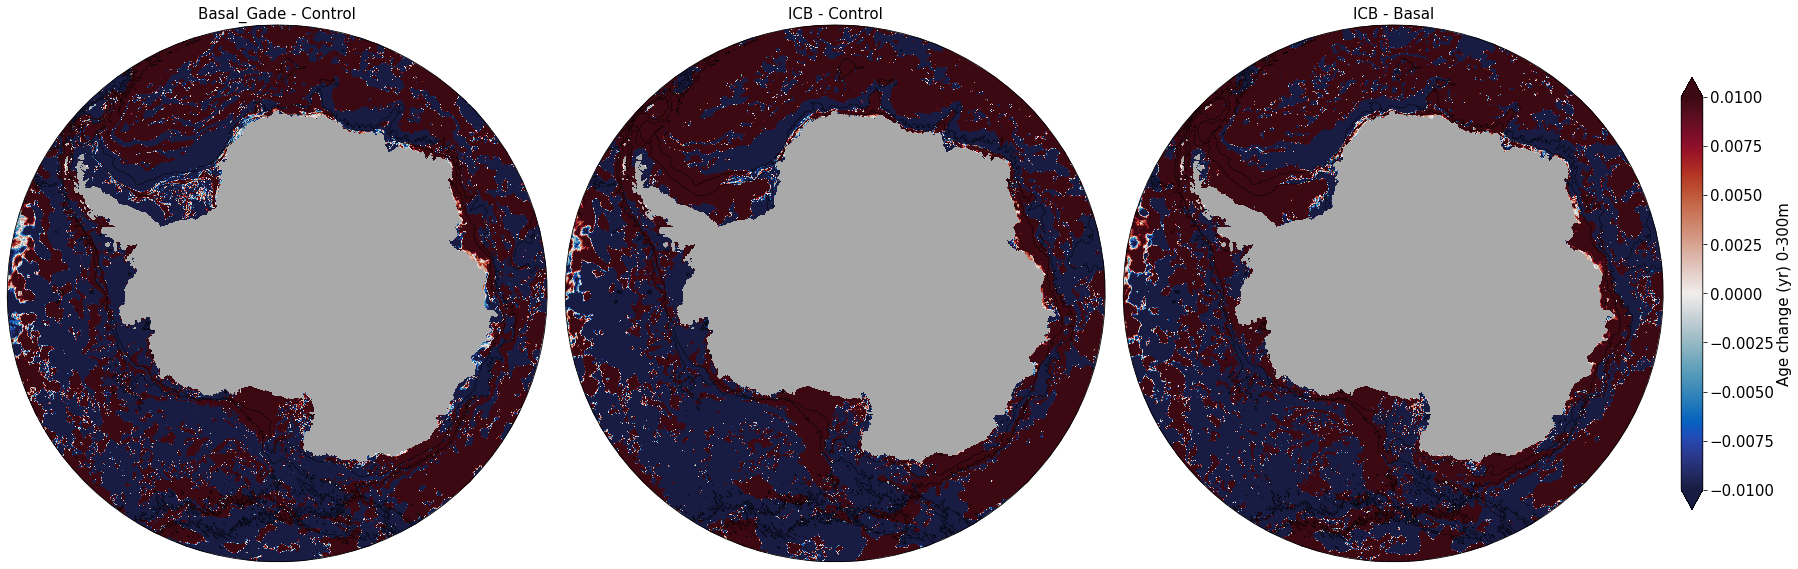

In [63]:
scale_max = 0.01

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Basal
ax = fig.add_axes([0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_icb_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# ICB - Basal
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

## plot:
cf = ax.pcolormesh(age_con.xt_ocean, age_con.yt_ocean, avet_avek_diff_age_icb_gade_con - avet_avek_diff_age_basal_gade_con, norm = norm,  
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - Basal',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Age change (yr) 0-300m',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'age_surf_y'+str(year)+'.png')